1. Computation of average search delays, relative entropy distance per neuron and l_1 distance per neuron


In [4]:
# (a) Computation of average search delays
import pandas as pd
import numpy as np

search_time_df = pd.read_csv("search-times-dataset.csv")

# Convert all values to numeric
search_time_dataset = search_time_df.apply(pd.to_numeric, errors='coerce')

# Subtracting the baseline rxn time from each value
adjusted_search_time_dataset = search_time_dataset - 328

# Compute the average search delay for each column
average_search_delays = np.array(adjusted_search_time_dataset.mean())
print(f"Average Search Delays :\n{average_search_delays}")


Average Search Delays :
[ 883.77777778 1081.40277778  985.25       1009.13888889  275.26388889
  296.66666667  503.31944444  502.79166667  313.40277778  307.52777778
  218.55555556  251.95833333  818.33333333  615.23611111  309.40277778
  341.93055556  239.84722222  209.38888889]


In [1]:
# (b) Computation of relative entropy distance per neuron
import pandas as pd
import numpy as np

firing_rates_df = pd.read_csv('firing-rates-dataset.csv')

# Convert all values to numeric
firing_rates_data = firing_rates_df.apply( pd.to_numeric, errors='coerce')
columns = firing_rates_data.shape[1]

relative_entropy_distances = []

for col_idx in range(0, columns, 2):  # Assuming oddball and distracter alternate
    if col_idx + 1 < columns:
        lambda_i1 = firing_rates_data.iloc[:, col_idx]  # Oddball (first column)
        lambda_j1 = firing_rates_data.iloc[:, col_idx + 1]  # Distracter (second column)

        lambda_i2 = firing_rates_data.iloc[:, col_idx + 1]  # Oddball (second column)
        lambda_j2 = firing_rates_data.iloc[:, col_idx]  # Distracter (first column)

        for lambda_i, lambda_j in [(lambda_i1, lambda_j1), (lambda_i2, lambda_j2)]:  # Compute both directions
            valid = (lambda_i > 0) & (lambda_j > 0)
            lambda_i_filtered = lambda_i[valid]
            lambda_j_filtered = lambda_j[valid]

            # Adjust N for valid neuron count
            N_valid = len(lambda_i_filtered)

            if N_valid > 0:
              # Compute the relative entropy per neuron
              D_ij = (1 / N_valid) * np.sum(lambda_i_filtered * np.log(lambda_i_filtered / lambda_j_filtered) - lambda_i_filtered + lambda_j_filtered)
              relative_entropy_distances.append(D_ij)

# Convert to an array
relative_entropy_distances = np.array(relative_entropy_distances)

print(f"Relative Entropy Distances per neuron :\n{relative_entropy_distances}")


Relative Entropy Distances per neuron :
[0.63834794 0.61835705 0.65685051 0.66293651 1.55337325 1.63076479
 1.11677337 1.09011194 1.46193832 1.56548597 1.77473095 2.12783769
 0.65428099 0.78416525 1.13060613 1.47729041 1.64344117 1.72498623]


In [3]:
# (b) Computation of relative l1 distance per neuron
import pandas as pd
import numpy as np

firing_rates_df = pd.read_csv('firing-rates-dataset.csv')

# Convert all values to numeric
firing_rates_data = firing_rates_df.apply(pd.to_numeric, errors='coerce')

columns = firing_rates_data.shape[1]
l1_distances = []

for col_idx in range(0, columns, 2):  # Assuming oddball and distracter alternate
    if col_idx + 1 < columns:
        lambda_i1 = firing_rates_data.iloc[:, col_idx]  # Oddball (first column)
        lambda_j1 = firing_rates_data.iloc[:, col_idx + 1]  # Distracter (second column)

        lambda_i2 = firing_rates_data.iloc[:, col_idx + 1]  # Oddball (second column)
        lambda_j2 = firing_rates_data.iloc[:, col_idx]  # Distracter (first column)

        for lambda_i, lambda_j in [(lambda_i1, lambda_j1), (lambda_i2, lambda_j2)]:  # Compute both directions
            valid_mask = ~np.isnan(lambda_i) & ~np.isnan(lambda_j)  # Exclude NaN values
            lambda_i_filtered = lambda_i[valid_mask]
            lambda_j_filtered = lambda_j[valid_mask]

            N_valid = len(lambda_i_filtered)  # Adjust N based on valid values

            if N_valid > 0:
                # Compute the ℓ1 distance per neuron
                L_ij = (1 / N_valid) * np.sum(np.abs(lambda_i_filtered - lambda_j_filtered))
                l1_distances.append(L_ij)

# Convert to an array
l1_distances = np.array(l1_distances)

print(f"l1 Distance per neuron :\n{l1_distances}")


l1 Distance per neuron :
[2.7756785  2.7756785  3.20633068 3.20633068 4.79391394 4.79391394
 3.79158273 3.79158273 4.13455124 4.13455124 4.72969894 4.72969894
 3.11108657 3.11108657 3.94509803 3.94509803 5.45929509 5.45929509]


2  Fitting a straight line passing through the origin.

 (a) With relative entropy distances on the x‑axis and inverse of average search delays on the y‑axis

 (b) With ℓ1 distances on the x‑axis and inverse of average search delays on the y‑axis

 and finding which one is the best fit

2 (a) Relative Entropy Distances vs Inverse Average Search Delay:
  Slope: 0.0022016859565323226
  MSE: 2.29531289562889e-07

2 (b) ℓ1 Distances vs Inverse Average Search Delays:
  Slope: 0.0007000776902229354
  MSE: 5.827512203447879e-07

The Relative Entropy model is a better fit (lower MSE).


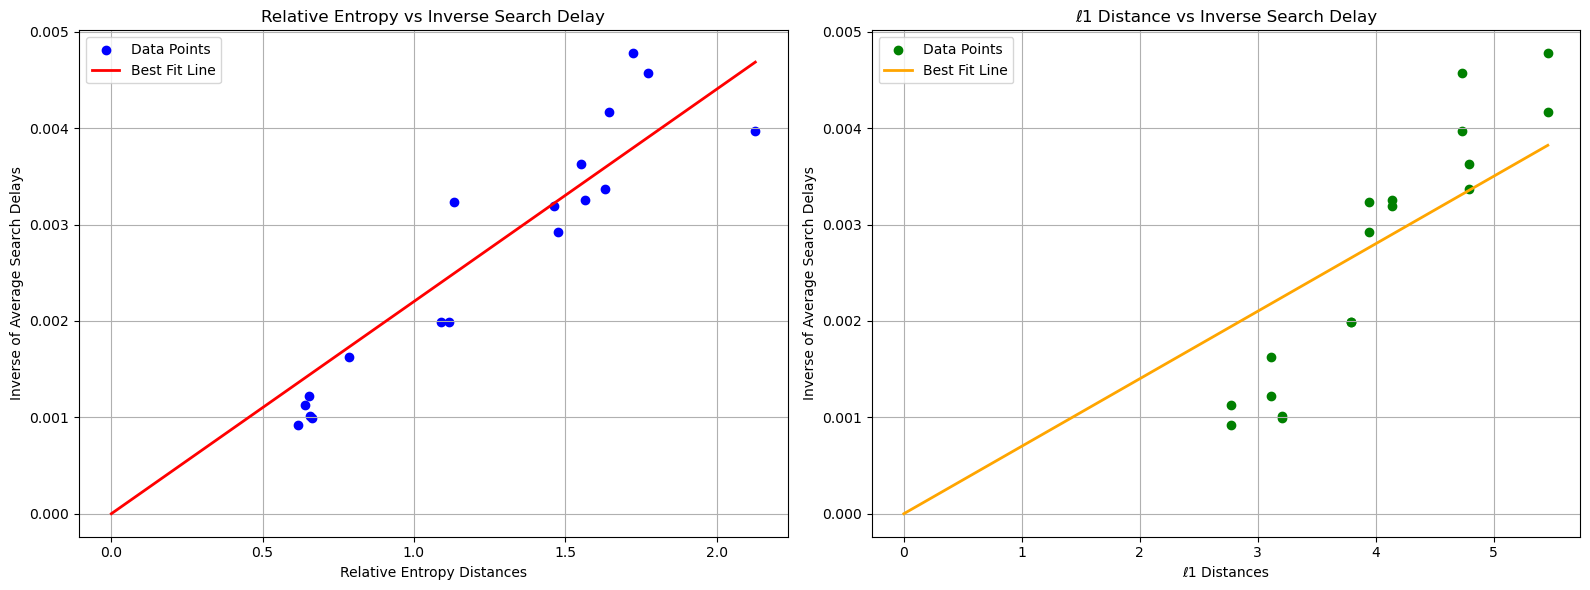

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# inverse of the average search delays
inv_avg_search_delays = 1 / average_search_delays

#2(a) Relative Entropy Distances vs Inverse Average Search Delay
X_rel = relative_entropy_distances.reshape(-1, 1)
y = inv_avg_search_delays

# Fit a linear regression model through the origin (force line to pass through 0)
model_rel = LinearRegression(fit_intercept=False)
model_rel.fit(X_rel, y)
y_pred_rel = model_rel.predict(X_rel)

slope_rel = model_rel.coef_[0]
mse_rel = mean_squared_error(y, y_pred_rel)

#2(b): ℓ1 Distances vs Inverse Average Search Delay
X_l1 = l1_distances.reshape(-1, 1)
model_l1 = LinearRegression(fit_intercept=False)
model_l1.fit(X_l1, y)
y_pred_l1 = model_l1.predict(X_l1)

slope_l1 = model_l1.coef_[0]
mse_l1 = mean_squared_error(y, y_pred_l1)

# Print the results
print("2 (a) Relative Entropy Distances vs Inverse Average Search Delay:")
print("  Slope:", slope_rel)
print("  MSE:", mse_rel)
print("\n2 (b) ℓ1 Distances vs Inverse Average Search Delays:")
print("  Slope:", slope_l1)
print("  MSE:", mse_l1)

if mse_rel < mse_l1:
    print("\nThe Relative Entropy model is a better fit (lower MSE).")
else:
    print("\nThe ℓ1 Distance model is a better fit (lower MSE).")

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# For (a)
x_line_rel = np.linspace(0, relative_entropy_distances.max(), 100)
y_line_rel = slope_rel * x_line_rel

ax[0].scatter(relative_entropy_distances, y, color='blue', label='Data Points')
ax[0].plot(x_line_rel, y_line_rel, color='red', linewidth=2, label='Best Fit Line')
ax[0].set_xlabel("Relative Entropy Distances")
ax[0].set_ylabel("Inverse of Average Search Delays")
ax[0].set_title("Relative Entropy vs Inverse Search Delay")
ax[0].legend()
ax[0].grid(True)

# For (b)
x_line_l1 = np.linspace(0, l1_distances.max(), 100)
y_line_l1 = slope_l1 * x_line_l1

ax[1].scatter(l1_distances, y, color='green', label='Data Points')
ax[1].plot(x_line_l1, y_line_l1, color='orange', linewidth=2, label='Best Fit Line')
ax[1].set_xlabel("ℓ1 Distances")
ax[1].set_ylabel("Inverse of Average Search Delays")
ax[1].set_title("ℓ1 Distance vs Inverse Search Delay")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


3. Fitting a Gammadistribution to the search delays.

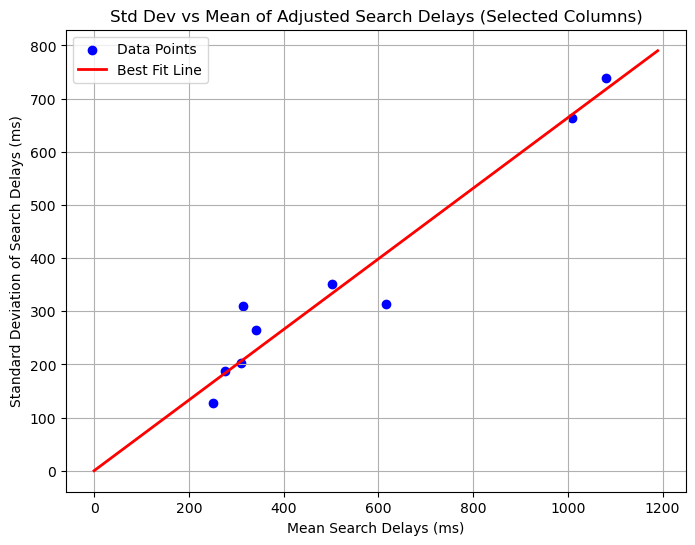

Estimated shape parameter (a): 2.2670239975726334
Estimated rate parameter (b): 0.0044631337587561415
Kolmogorov–Smirnov test statistic KS(F,G): 0.21421870633971035


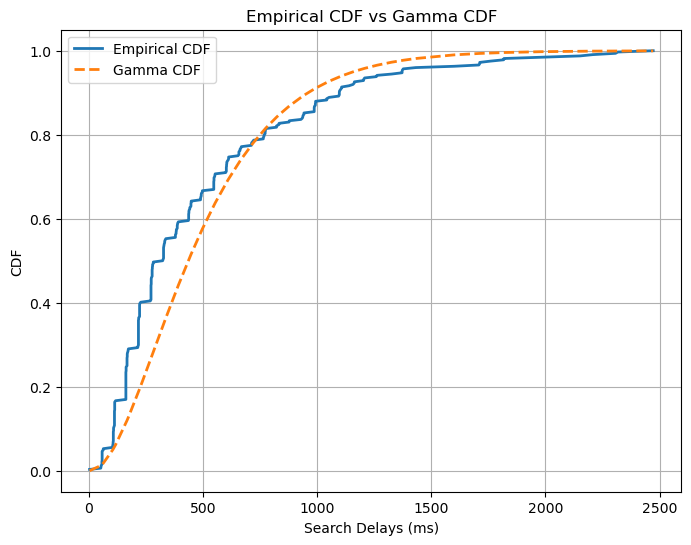

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import gamma

# 3 (a): Estimating the Shape Parameter
search_times_df = pd.read_csv('search-times-dataset.csv')

# Convert all columns to numeric
search_times_df = search_times_df.apply(pd.to_numeric, errors='coerce')

# Randomly select half the columns for shape parameter estimation
all_columns = list(search_times_df.columns)
num_columns = len(all_columns)
selected_columns = np.random.choice(all_columns, size=num_columns // 2, replace=False)

mean_search_delays = []
std_search_delays = []

# For each selected column, subtract 328 ms and calculate mean and standard deviation
for col in selected_columns:
    adjusted_times = search_times_df[col] - 328
    # Compute mean and std, ignoring NaN values
    mean_search_delays.append(np.nanmean(adjusted_times))
    std_search_delays.append(np.nanstd(adjusted_times))

# Convert lists to numpy arrays
mean_search_delays = np.array(mean_search_delays)
std_search_delays = np.array(std_search_delays)

# Plot standard deviation vs mean search delays
plt.figure(figsize=(8,6))
plt.scatter(mean_search_delays, std_search_delays, color='blue', label='Data Points')
plt.xlabel('Mean Search Delays (ms)')
plt.ylabel('Standard Deviation of Search Delays (ms)')
plt.title('Std Dev vs Mean of Adjusted Search Delays (Selected Columns)')

# Fit a straight line through the origin: model: std = m * mean
X = mean_search_delays.reshape(-1, 1)
y = std_search_delays
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
m = model.coef_[0]  # Slope of the line

# Plot the best-fit line
x_line = np.linspace(0, mean_search_delays.max()*1.1, 100)
y_line = m * x_line
plt.plot(x_line, y_line, color='red', linewidth=2, label='Best Fit Line')
plt.legend()
plt.grid(True)
plt.show()

# Estimate the shape parameter using: slope m = 1/sqrt(a) => a = (1/m)^2
estimated_shape = (1 / m) ** 2
print("Estimated shape parameter (a):", estimated_shape)

# 3 (b): Estimating the Rate Parameter
# Identify the columns not used in part (a)
selected_columns_set = set(selected_columns)
non_selected_columns = [col for col in all_columns if col not in selected_columns_set]

# From each non-selected column, randomly select half the samples (rows)
rate_samples = []
for col in non_selected_columns:
    adjusted_times = search_times_df[col] - 328
    samples = adjusted_times.dropna().sample(frac=0.5, random_state=42)
    rate_samples.extend(samples.values)

# Convert the pooled samples to a NumPy array and compute the overall mean
rate_samples = np.array(rate_samples)
mean_pool = np.nanmean(rate_samples)

# Using the relationship: mean = a/b  =>  b = a/mean,
estimated_rate = estimated_shape / mean_pool
print("Estimated rate parameter (b):", estimated_rate)

# 3 (c): Empirical CDF vs Gamma CDF and KS Test Statistic
remaining_samples = []
for col in non_selected_columns:
    adjusted_times = search_times_df[col] - 328
    adjusted_clean = adjusted_times.dropna()
    sampled = adjusted_clean.sample(frac=0.5, random_state=42)
    remaining_indices = adjusted_clean.index.difference(sampled.index)
    remaining_values = adjusted_clean.loc[remaining_indices]
    remaining_samples.extend(remaining_values.values)

# Convert remaining samples to a numpy array
search_delays = np.array(remaining_samples)

# Compute the empirical CDF of search_delays
search_delays_sorted = np.sort(search_delays)
n = len(search_delays_sorted)
empirical_cdf = np.arange(1, n+1) / n

# Compute the Gamma CDF using estimated parameters (scale = 1/b in scipy)
gamma_cdf = gamma.cdf(search_delays_sorted, a=estimated_shape, scale=1/estimated_rate)

# Compute the Kolmogorov–Smirnov test statistic: max|F(x)-G(x)|
KS_stat = np.max(np.abs(empirical_cdf - gamma_cdf))
print("Kolmogorov–Smirnov test statistic KS(F,G):", KS_stat)

# Plot the empirical CDF and the Gamma CDF on the same figure
plt.figure(figsize=(8,6))
plt.plot(search_delays_sorted, empirical_cdf, label='Empirical CDF', lw=2)
plt.plot(search_delays_sorted, gamma_cdf, label='Gamma CDF', lw=2, linestyle='--')
plt.xlabel('Search Delays (ms)')
plt.ylabel('CDF')
plt.title('Empirical CDF vs Gamma CDF')
plt.legend()
plt.grid(True)
plt.show()
